In [158]:
# This line is a convenience to import most packages you'll need. You may need to import others (e.g. random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math, csv
from IPython.display import Audio
from sklearn.datasets import load_iris
import librosa.display
%matplotlib inline

chord_data = librosa.load('c.wav', sr= 8000)
#chord = chord_data[0][10000:30000]
chord = chord_data[0]
print(len(chord))
sr = chord_data[1]
Audio(chord, rate=sr)


7244


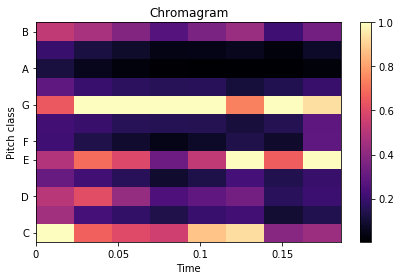

In [159]:
chromagram = librosa.feature.chroma_stft(chord, sr=sr, n_fft=2048, hop_length=1024)

#librosa.display.specshow(chromagram,y_axis='chroma',x_axis='time')
#plt.figure(figsize=(10,3))
#plt.imshow(chromagram)
librosa.display.specshow(chromagram,y_axis='chroma',x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()


194.14531


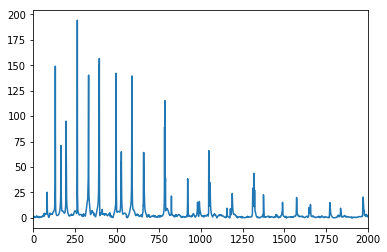

In [160]:
fft_chroma_test = np.fft.fft(chord)
fft_chroma_test = np.abs(fft_chroma_test)
plt.figure(1)
win_len = len(chord)
freq_arr = np.arange(win_len) * (sr/win_len)
plt.plot(freq_arr,fft_chroma_test)
plt.xlim([0,2000])
print(np.max(fft_chroma_test))

'\ny = np.zeros(len(hps5))\nfor i in range(len(hps5)):\n    product = hps1[i] * hps2[i] * hps3[i] * hps4[i] * hps5[i]\n    y[i] = product\n\n'

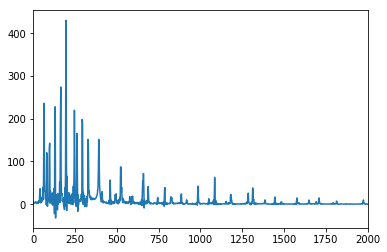

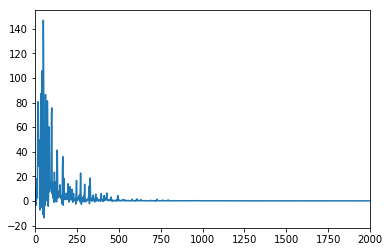

In [154]:
#chord = sp.signal.windows.hann(len(chord)) * chord

hps1 = np.abs(np.fft.fft(sp.signal.decimate(chord, 1)))
hps2 = np.abs(np.fft.fft(sp.signal.decimate(chord, 2)))
hps3 = np.abs(np.fft.fft(sp.signal.decimate(chord, 4)))
hps4 = np.abs(np.fft.fft(sp.signal.decimate(chord, 8)))
hps5 = np.abs(np.fft.fft(sp.signal.decimate(chord, 16)))

'''
hps1 = sp.signal.decimate(np.abs(np.fft.fft(chord)), 1)
hps2 = sp.signal.decimate(np.abs(np.fft.fft(chord)), 2)
hps3 = sp.signal.decimate(np.abs(np.fft.fft(chord)), 4)
hps4 = sp.signal.decimate(np.abs(np.fft.fft(chord)), 8)
hps5 = sp.signal.decimate(np.abs(np.fft.fft(chord)), 16)
'''
fft_chord = np.fft.fft(chord)
fft_chord = np.abs(fft_chroma_test)

plt.figure(0)
hps1 = sp.signal.decimate(fft_chord, 2)
win_len2 = len(hps1)
freq_arr2 = np.arange(win_len2) * ((sr/2)/win_len2)
plt.plot(freq_arr2, hps1)
plt.xlim([0,2000])

plt.figure(1)
hps2 = sp.signal.decimate(fft_chord, 8)
win_len2 = len(hps2)
freq_arr2 = np.arange(win_len2) * ((sr/8)/win_len2)
plt.plot(freq_arr2, hps2)
plt.xlim([0,2000])
'''
y = np.zeros(len(hps5))
for i in range(len(hps5)):
    product = hps1[i] * hps2[i] * hps3[i] * hps4[i] * hps5[i]
    y[i] = product

'''

In [146]:
plt.figure(2)
win_len2 = len(chord)
freq_arr2 = np.arange(win_len2) * (sr/win_len2)
#plt.plot(freq_arr2, y)
n = np.argsort(y)
print(n)


[636 414 461 852 915 926 823 460 921 824 922 763 458 923 846 814 711 490
 911 815 924 820 836 925 831 920 459 761 825 841 753 912 834 821 832 816
 931 929 752 833 817 914 838 822 692 457 928 750 851 913 646 933 501 818
 930 634 633 927 934 773 456 840 819 462 917 684 839 830 907 704 513 678
 842 869 932 689 488 919 487 754 486 905 918 908 631 916 813 494 854 765
 755 856 643 632 688 835 705 680 709 485 687 906 829 638 828 909 936 762
 855 843 463 910 514 861 860 837 859 480 853 857 651 683 686 498 935 749
 645 756 652 650 482 644 764 708 478 483 685 862 766 500 844 902 790 618
 620 637 484 937 630 747 586 827 746 499 700 696 701 863 767 845 424 422
 826 858 886 901 904 710 778 455 847 464 903 426 613 635 884 885 642 864
 497 639 519 699 512 865 751 707 758 495 812 777 524 706 887 695 776 479
 476 883 653 640 900 489 503 612 525 522 880 520 641 866 611 477 658 521
 899 748 698 429 727 768 697 615 702 427 397 780 428 574 745 454 881 475
 474 811 850 432 879 703 573 609 517 775 867 523 61

<Figure size 432x288 with 0 Axes>

In [111]:
magSpec = librosa.core.stft(chord, n_fft = 2048, hop_length=1024)
magSpec = np.abs(magSpec)
hps1 = sp.signal.decimate(magSpec, 1)
hps2 = sp.signal.decimate(magSpec, 2)
hps3 = sp.signal.decimate(magSpec, 4)
hps4 = sp.signal.decimate(magSpec, 8)
hps5 = sp.signal.decimate(magSpec, 16)
y = np.zeros(shape=(hps5.shape[0],hps5.shape[1]))

for i in range(hps5.shape[1]):
    product = hps1[:,i] * hps2[:,i] * hps3[:,i] * hps4[:,i] * hps5[:,i]
    y[:,i] = product
    
print(y)

[[ 5.53356688e+00  4.73549567e-02 -4.30172298e-04]
 [ 1.18981902e+00  1.16405416e+00  2.92284894e-02]
 [ 9.10048499e-01  7.16734923e+00  5.42059265e-03]
 ...
 [ 1.35452420e-17  2.89648874e-13  8.83123288e-13]
 [ 5.30903661e-11  6.75278951e-15  6.92748522e-14]
 [ 5.34513791e-10  4.97375756e-16 -1.81969823e-14]]
